In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## 1 Data description

In [3]:
cuisines = pd.read_csv('data/Cuisines.csv', header = None)
recipes = pd.read_csv('data/recipes.csv')

In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Columns: 710 entries, 'acorn squash' to cuisine
dtypes: int64(710)
memory usage: 22.9 MB


In [5]:
recipes.describe()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
count,4236.000000,4236.00000,4236.000000,4236.00000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,...,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.00000
mean,0.000708,0.00118,0.000944,0.00118,0.000236,0.000708,0.000944,0.013220,0.019594,0.000236,...,0.004721,0.000708,0.000236,0.000708,0.002361,0.035175,0.000472,0.003541,0.029037,5.50000
std,0.026606,0.03434,0.030718,0.03434,0.015365,0.026606,0.030718,0.114229,0.138617,0.015365,...,0.068558,0.026606,0.015365,0.026606,0.048536,0.184243,0.021726,0.059409,0.167930,3.45246
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.75000
50%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.50000
75%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.25000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.00000


In [6]:
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12 non-null     int64 
 1   1       12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [24]:
cuisines = cuisines.rename(columns = {1: 'cuisine_label'})
cuisines

,0,cuisine_label
0,1,Chinese
1,2,English
2,3,French
3,4,German
4,5,Greek
5,6,Indian
6,7,Italian
7,8,Japanese
8,9,Mexican
9,10,Moroccan


## 2. Distributions of cuisines and ingredients 

In [8]:
recipes_by_cuisine = recipes.groupby('cuisine').cuisine.agg('count').to_frame('recipes') \
                            .merge(cuisines['cuisine_label'], how = 'left', left_index = True, right_index = True)

recipes_by_cuisine

,recipes,cuisine_label
cuisine,,
0,353,Chinese
1,353,English
2,353,French
3,353,German
4,353,Greek
5,353,Indian
6,353,Italian
7,353,Japanese
8,353,Mexican


In [9]:
ingredients_usage = recipes.drop('cuisine', axis=1).sum(axis = 0).sort_values(ascending = False)

In [10]:
top_10 = ingredients_usage[0:9]
top_10

garlic         2340
onion          2157
'olive oil'    1390
salt           1382
chicken        1324
pepper         1147
tomato          953
water           894
ginger          855
dtype: int64

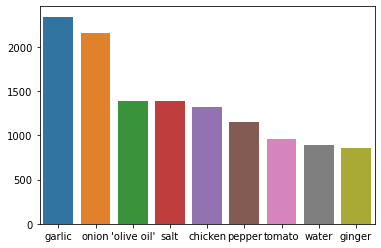

In [19]:
sns.barplot(x = top_10.index ,y = top_10)

In [38]:
def get_top_ingredients(cuisine, n = 10, plot = False):
    filtered_recipes = recipes[recipes.cuisine == cuisine]
    ingredients_usage = filtered_recipes.drop('cuisine', axis=1).sum(axis = 0).sort_values(ascending = False)
    top_n = ingredients_usage[0:n - 1]
    if plot:
        plt.figure()
        sns.barplot(x = top_n.index ,y = top_n)
        plt.title(cuisines.loc[i]['cuisine_label'])
        plt.xticks(rotation=45)
    return top_n

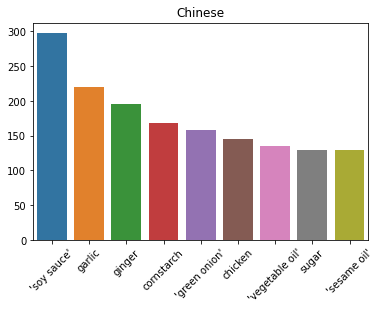

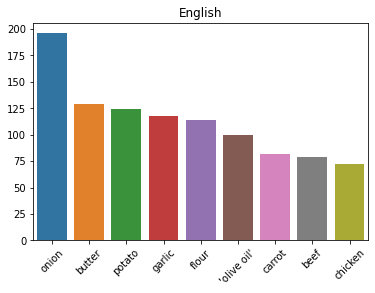

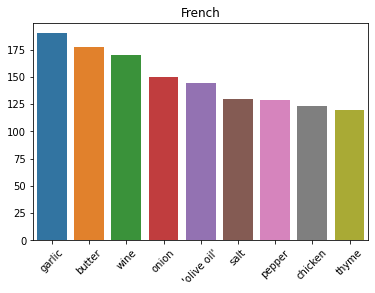

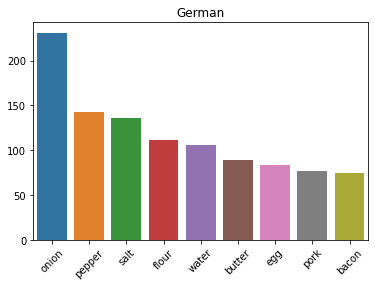

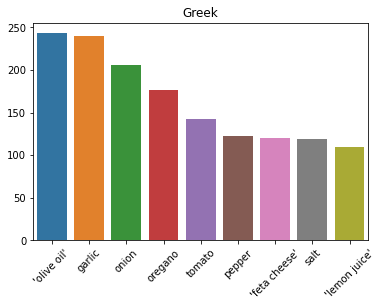

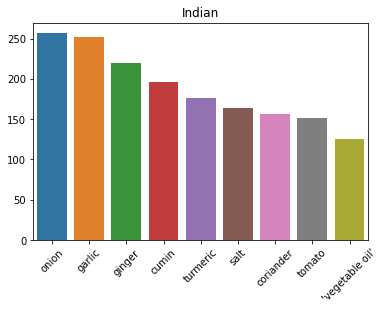

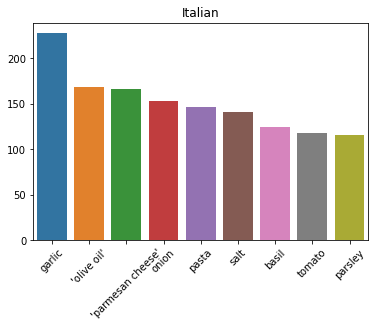

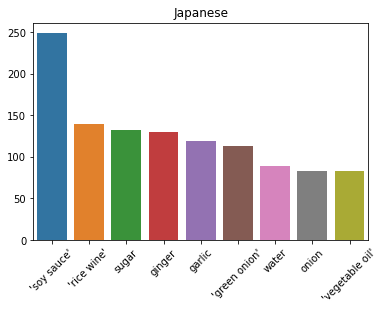

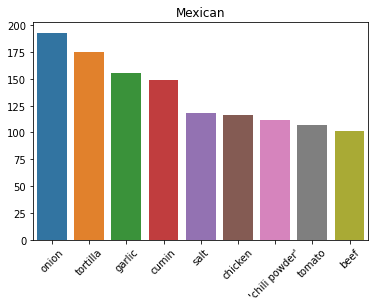

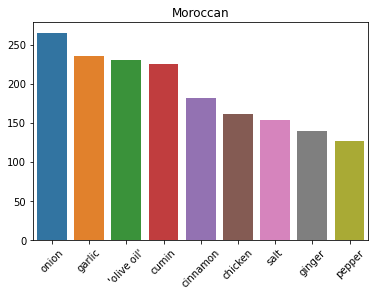

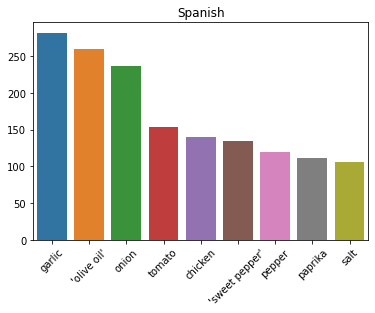

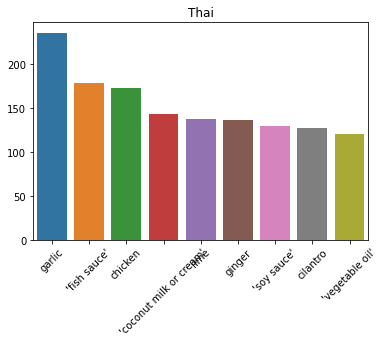

In [39]:
for i in range(cuisines.shape[0]):
    get_top_ingredients(i, n = 10, plot = True)

### Characteristic ingredients

In [41]:
def get_ingredients_sum(cuisine):
    filtered_recipes = recipes[recipes.cuisine == cuisine]
    ingredients_usage = filtered_recipes.drop('cuisine', axis=1).sum(axis = 0)
    return ingredients_usage

In [42]:
cuisines_ingredients_usage = {}
for i in range(cuisines.shape[0]):
    cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']] = get_ingredients_sum(i)

In [61]:
ingredients_usage_by_cuisine = pd.concat([cuisines_ingredients_usage[cuisines.loc[0]['cuisine_label']],
                                         cuisines_ingredients_usage[cuisines.loc[1]['cuisine_label']]], axis = 1)
for i in range(2, cuisines.shape[0]):
    ingredients_usage_by_cuisine = pd.concat([ingredients_usage_by_cuisine,
                                              cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']]], axis = 1)

ingredients_usage_by_cuisine = ingredients_usage_by_cuisine.T.reset_index()
ingredients_usage_by_cuisine['cuisine_label'] = cuisines['cuisine_label']    
ingredients_usage_by_cuisine

,index,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine_label
0,0,0,0,0,0,0,1,0,0,4,...,0,0,1,0,0,0,0,8,3,Chinese
1,1,0,0,0,5,0,0,0,2,1,...,2,0,0,1,0,4,0,0,7,English
2,0,0,0,0,0,0,0,0,0,1,...,2,0,0,0,2,2,0,2,16,French
3,0,0,0,0,0,0,0,0,13,0,...,3,0,0,0,0,1,0,1,2,German
4,0,0,1,0,0,1,0,1,10,0,...,1,0,0,0,1,36,0,1,17,Greek
5,0,0,0,1,0,0,0,0,4,14,...,0,0,0,2,0,83,0,0,2,Indian
6,0,1,0,0,0,0,0,3,2,0,...,8,0,0,0,3,0,0,0,12,Italian
7,0,0,0,0,0,0,1,0,3,1,...,1,0,0,0,0,2,0,1,2,Japanese
8,0,0,3,0,0,0,0,0,3,3,...,1,0,0,0,1,2,0,0,6,Mexican
9,0,2,0,1,0,0,1,0,17,42,...,1,0,0,0,3,15,2,1,31,Moroccan


In [66]:
mean_ingredients_usage = np.mean(ingredients_usage_by_cuisine, axis = 0)
std_ingredients_usage = np.std(ingredients_usage_by_cuisine, axis = 0)

(710,)

In [74]:
def get_char_ingredients(cuisine, threshold_std = 2):
    cuisine_usage = cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']]
    threshold = mean_ingredients_usage + threshold_std*std_ingredients_usage
    usage_diff = cuisine_usage - threshold
    return cuisine_usage[usage_diff > 0]

cuisines_char_ingredients = {}

for i in range(cuisines.shape[0]):
    cuisines_char_ingredients[cuisines.loc[i]['cuisine_label']] = get_char_ingredients(i).sort_values(ascending = False)
    

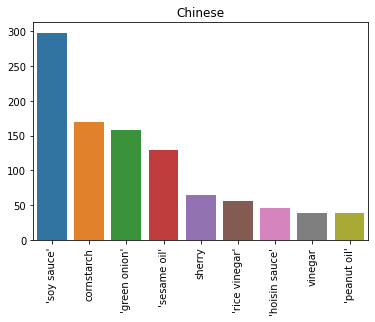

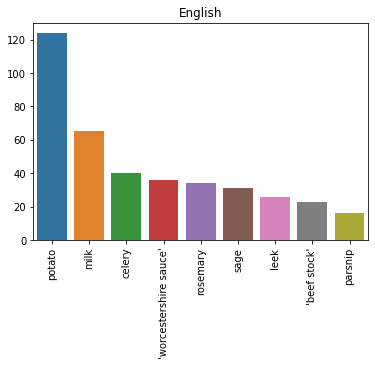

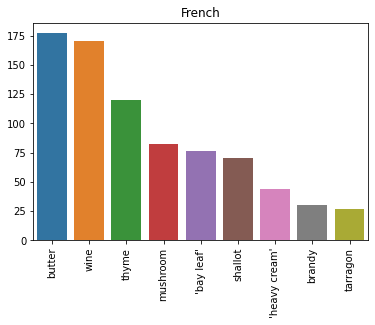

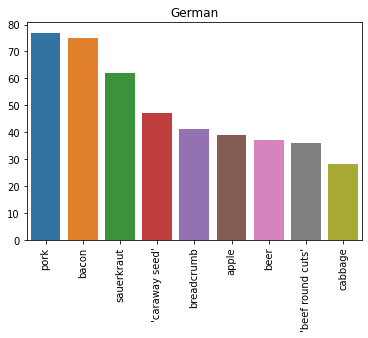

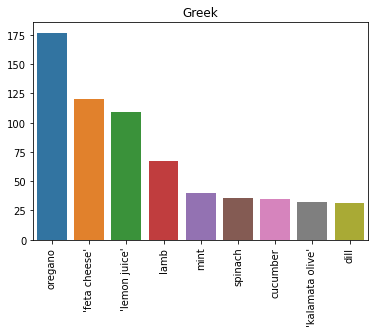

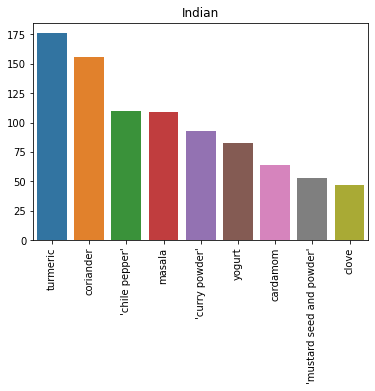

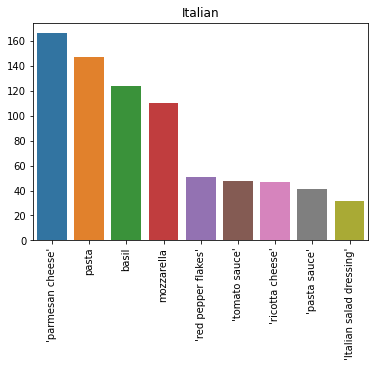

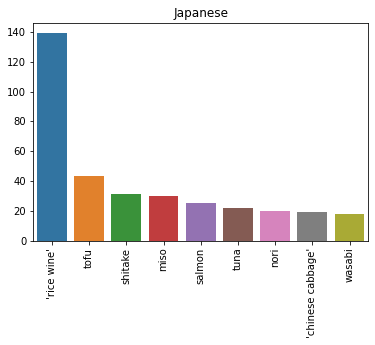

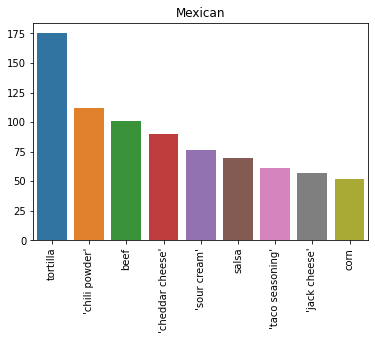

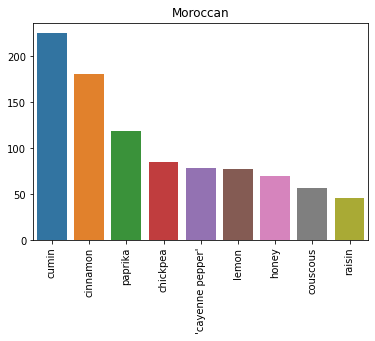

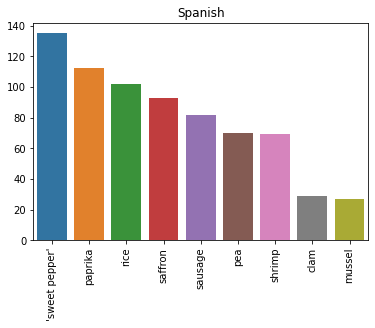

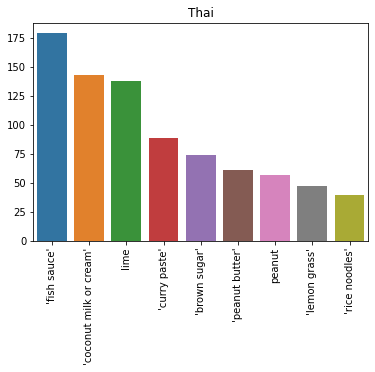

In [80]:
for key, value in cuisines_char_ingredients.items():
    plt.figure()
    sns.barplot(x = value.index[0:9], y = value[0:9])
    plt.title(key)
    plt.xticks(rotation=90)

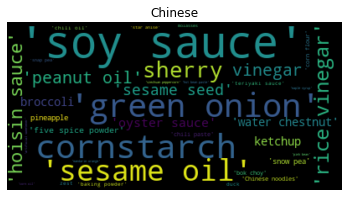

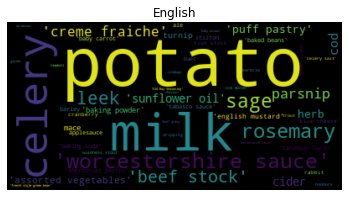

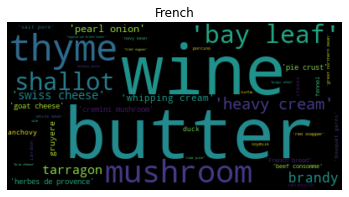

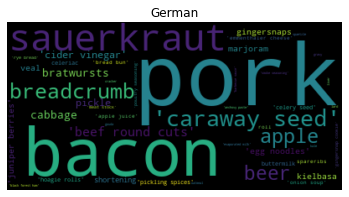

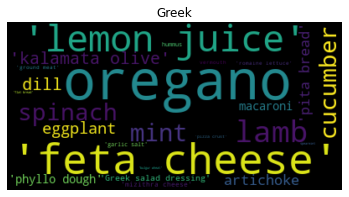

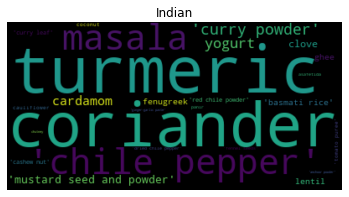

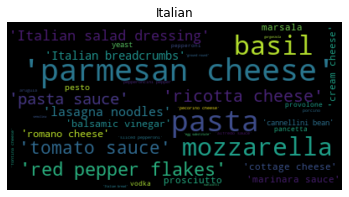

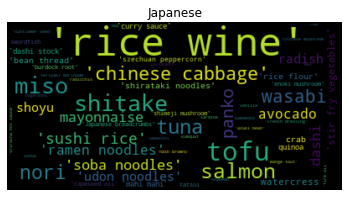

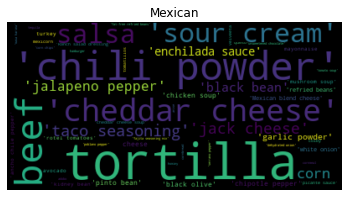

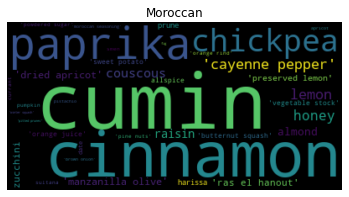

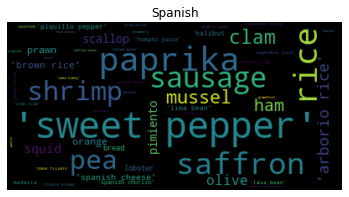

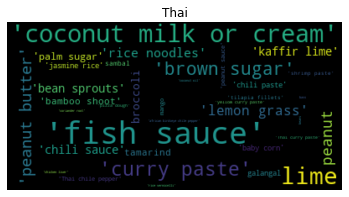

In [97]:
for key, value in cuisines_char_ingredients.items():
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=value)
    plt.figure()
    plt.title(key)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()